In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# Question 1

#### Implement the K-Means clustering algorithm from scratch. Test your implementation using the features from the digits dataset available in scikit-learn (sklearn.datasets.load_digits). In addition to the implementation, visualize the loss (inertia) over iterations and plot the resulting clusters with labels to evaluate the algorithm's performance.

In [8]:
## loading in the digits dataset and creating the x and y
digits = load_digits()
## df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
## df.head()
x = digits.data
y = digits.target

In [10]:
## normalizing the data 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [72]:
## defining K-means algorithm from scratch
class KMeansScratch:
    def __init__(self, k = 10, max_iters = 100):
        self.k = k
        self.max_iters = max_iters
        self.inertia_ = []  # To track inertia over iterations

    def initialize_centroids(self, x):
        np.random.seed(42)
        random_indices = np.random.permutation(x.shape[0])
        centroids = x[random_indices[:self.k]]
        return centroids

    def assign_clusters(self, x, centroids):
        distances = np.linalg.norm(x[:, np.newaxis] - centroids, axis = 2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, x, labels):
        centroids = np.array([x[labels == i].mean(axis=0) for i in range(self.k)])
        return centroids

    def compute_inertia(self, x, centroids, labels):
        distances = np.linalg.norm(x - centroids[labels], axis = 1)
        return np.sum(distances ** 2)

    def fit(self, X):
        centroids = self.initialize_centroids(X)
        
        for i in range(self.max_iters):
            labels = self.assign_clusters(X, centroids)
            new_centroids = self.update_centroids(X, labels)
            inertia = self.compute_inertia(X, new_centroids, labels)
            
            ## tracking inertia (loss) at each iteration
            self.inertia_.append(inertia)
            
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids
        
        return centroids, labels

In [74]:
## training the K-Means algorithm
kmeans = KMeansScratch(k = 10)
centroids, labels = kmeans.fit(x)

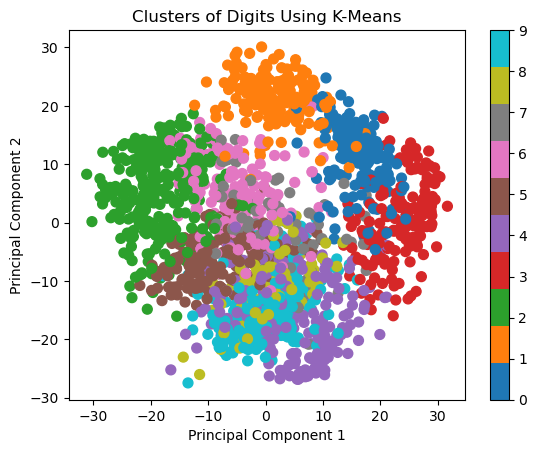

In [76]:
## visualizing the results by using PCA for dimensionality reduction
pca = PCA(2) ## reducing to 2 dimensions
x_2d = pca.fit_transform(x)

plt.scatter(x_2d[:, 0], x_2d[:, 1], c = labels, cmap = 'tab10', s = 50)
plt.title("Clusters of Digits Using K-Means")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

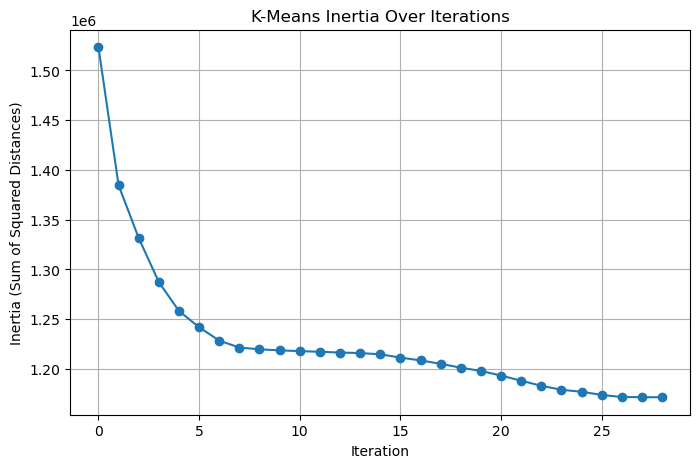

In [141]:
## visualizing inertia over iterations
plt.figure(figsize = (8, 5))
plt.plot(kmeans.inertia_, marker='o')
plt.title('K-Means Inertia Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

# Question 2

#### Implement the K-Medoids clustering algorithm from scratch. Similar to Question 1, use the digits dataset scikit-learn (sklearn.datasets.load_digits) to test your implementation. Additionally, provide a plot of the loss (cost function) across iterations and visualize the final clusters with labels to assess the performance of your algorithm.m.


In [88]:
## defining K-Medoids algorithm from scratch
class KMedoidsScratch:
    def __init__(self, k = 10, max_iters = 100):
        self.k = k
        self.max_iters = max_iters
        self.cost_ = []  ## to track the cost function over iterations

    def initialize_medoids(self, x):
        np.random.seed(42)  ## for reproducibility
        random_indices = np.random.permutation(x.shape[0])
        medoids = x[random_indices[:self.k]]
        return medoids

    def assign_clusters(self, x, medoids):
        ## compute pairwise distances between each point and medoids
        distances = pairwise_distances(x, medoids, metric = 'euclidean')
        ## assign each point to the nearest medoid
        return np.argmin(distances, axis = 1)

    def update_medoids(self, x, labels):
        new_medoids = np.copy(x[np.random.permutation(x.shape[0])[:self.k]])  ## initialize randomly
        for i in range(self.k):
            ## points assigned to the i-th medoid
            cluster_points = x[labels == i]
            ## compute the total cost for each point in the cluster to become the new medoid
            if len(cluster_points) > 0:
                distances_within_cluster = pairwise_distances(cluster_points, cluster_points, metric = 'euclidean')
                new_medoid_idx = np.argmin(np.sum(distances_within_cluster, axis = 1))
                new_medoids[i] = cluster_points[new_medoid_idx]
        return new_medoids

    def compute_cost(self, x, medoids, labels):
        distances = pairwise_distances(x, medoids[labels], metric = 'euclidean')
        return np.sum(distances)

    def fit(self, x):
        medoids = self.initialize_medoids(x)
        for i in range(self.max_iters):
            labels = self.assign_clusters(x, medoids)
            new_medoids = self.update_medoids(x, labels)
            cost = self.compute_cost(x, new_medoids, labels)
            
            # Track the cost function
            self.cost_.append(cost)
            
            if np.all(medoids == new_medoids):
                break
            medoids = new_medoids
        
        return medoids, labels

In [139]:
## training the K-Medoids algorithm
kmedoids = KMedoidsScratch(k = 10)
medoids, labels = kmedoids.fit(x)

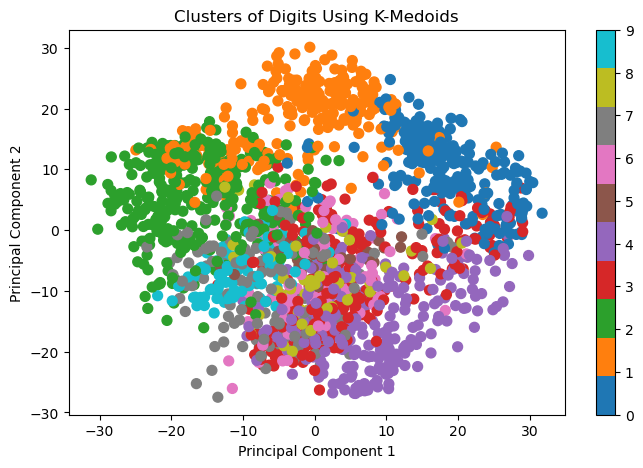

In [94]:
## visualize the clusters using PCA for dimensionality reduction
plt.figure(figsize = (8, 5))
plt.scatter(x_2d[:, 0], x_2d[:, 1], c = labels, cmap = 'tab10', s = 50)
plt.title("Clusters of Digits Using K-Medoids")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

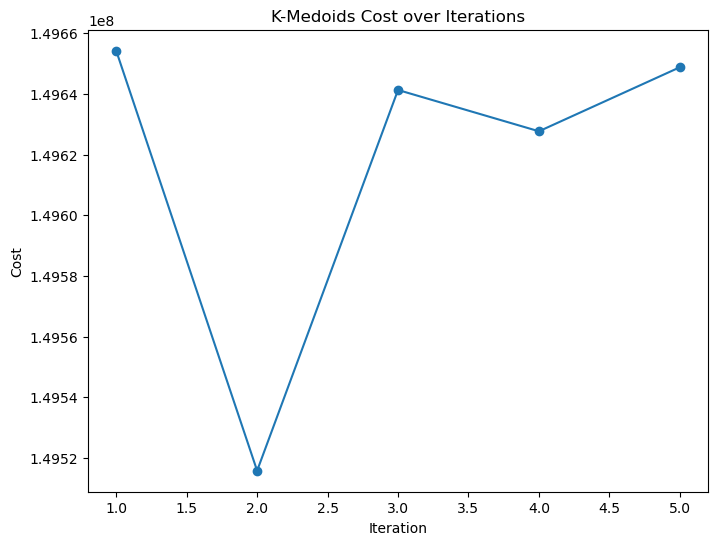

In [137]:
# Plot the cost (loss) over iterations
plt.figure(figsize = (8, 6))
plt.plot(range(1, len(kmedoids.cost_) + 1), kmedoids.cost_, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('K-Medoids Cost over Iterations')
plt.show()

# Question 3

#### Use the scikit-learn library to implement Hierarchical Clustering. Test your implementation using the digits dataset from scikit-learn (sklearn.datasets.load_digits). Additionally, plot the dendrogram to visualize the hierarchical structure and provide cluster visualizations to assess the clustering performance.ce.


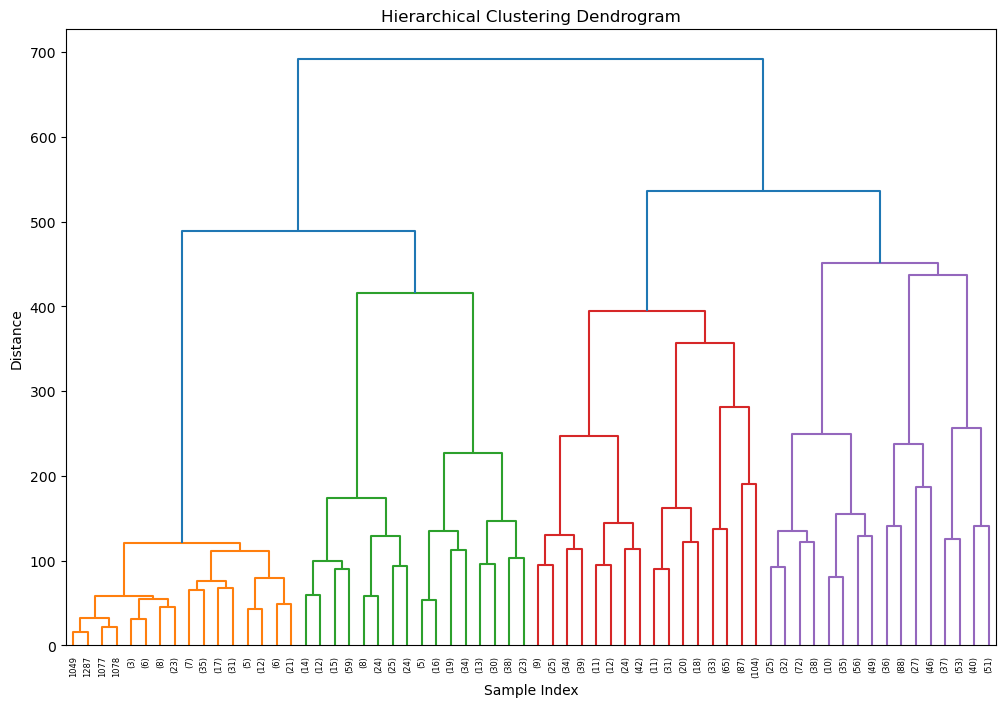

In [133]:
## Hierarchical clustering using Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters = 10)  # Clustering into 10 clusters (for digits)
labels = agg_clustering.fit_predict(x)

# Perform Hierarchical Clustering using the scikit-learn library
linked = linkage(x, method = 'ward')

# Plot the dendrogram
plt.figure(figsize = (12, 8))
dendrogram(linked, truncate_mode='level', p = 5)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

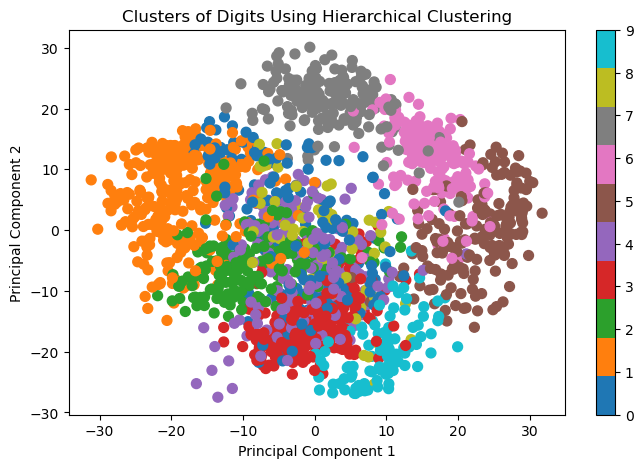

In [135]:
## Visualize the clusters using PCA for dimensionality reduction
plt.figure(figsize = (8, 5))
plt.scatter(x_2d[:, 0], x_2d[:, 1], c = labels, cmap = 'tab10', s = 50)
plt.title("Clusters of Digits Using Hierarchical Clustering")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()